## Testing the Object Oriented Paradigm

In [1]:
import sys    
%load_ext Cython
sys.path.insert(1, '../core')
from user_input import MaterialProperty, Material, MixtureProperty, Mixture

# Define properties for each material
properties_mat_1 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=20, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.0001, lower_bound=1e-5),
    MaterialProperty(prop='bulk_modulus', upper_bound=100, lower_bound=50),
    MaterialProperty(prop='shear_modulus', upper_bound=100, lower_bound=80),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2, lower_bound=1),
]

properties_mat_2 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=5, lower_bound=2),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.009, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=400, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=200, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.3, lower_bound=1.3),
]

properties_mat_3 = [
    MaterialProperty(prop='elec_cond_300k_low_doping', upper_bound=10, lower_bound=1),
    MaterialProperty(prop='therm_cond_300k_low_doping', upper_bound=0.005, lower_bound=1e-4),
    MaterialProperty(prop='bulk_modulus', upper_bound=300, lower_bound=20),
    MaterialProperty(prop='shear_modulus', upper_bound=300, lower_bound=100),
    MaterialProperty(prop='universal_anisotropy', upper_bound=2.1, lower_bound=0.9),
]

# Define properties for the mixture
properties_mixture = [
    MixtureProperty(prop='elec_cond_300k_low_doping', desired_prop=9),
    MixtureProperty(prop='therm_cond_300k_low_doping', desired_prop=0.007),
    MixtureProperty(prop='bulk_modulus', desired_prop=234),
    MixtureProperty(prop='shear_modulus', desired_prop=150),
    MixtureProperty(prop='universal_anisotropy', desired_prop=1.5),
]

# Create Material & Mixture instances
mat_1 = Material(name='mat_1', properties=properties_mat_1)
mat_2 = Material(name='mat_2', properties=properties_mat_2)
mat_3 = Material(name='mat_3', properties=properties_mat_3)
mixture = Mixture(name='mixture', properties=properties_mixture)
aggregate = [mat_1, mat_2, mat_3, mixture]

user_input = {}
for entity in aggregate:
    entity_name = entity.name
    properties = entity.properties
    user_input[entity_name] = {}
    for property in properties:  
        property_name = property.prop
        user_input[entity_name][property_name] = {}
        if type(property) == MaterialProperty:
            user_input[entity_name][property_name]['upper_bound'] = property.upper_bound  
            user_input[entity_name][property_name]['lower_bound'] = property.lower_bound   
        if type(property) == MixtureProperty:
            user_input[entity_name][property_name]['desired_prop'] = property.desired_prop
 
print("User Input: ", user_input)

User Input:  {'mat_1': {'elec_cond_300k_low_doping': {'upper_bound': 20.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.0001, 'lower_bound': 1e-05}, 'bulk_modulus': {'upper_bound': 100.0, 'lower_bound': 50.0}, 'shear_modulus': {'upper_bound': 100.0, 'lower_bound': 80.0}, 'universal_anisotropy': {'upper_bound': 2.0, 'lower_bound': 1.0}}, 'mat_2': {'elec_cond_300k_low_doping': {'upper_bound': 5.0, 'lower_bound': 2.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.009, 'lower_bound': 0.0001}, 'bulk_modulus': {'upper_bound': 400.0, 'lower_bound': 20.0}, 'shear_modulus': {'upper_bound': 200.0, 'lower_bound': 100.0}, 'universal_anisotropy': {'upper_bound': 2.3, 'lower_bound': 1.3}}, 'mat_3': {'elec_cond_300k_low_doping': {'upper_bound': 10.0, 'lower_bound': 1.0}, 'therm_cond_300k_low_doping': {'upper_bound': 0.005, 'lower_bound': 0.0001}, 'bulk_modulus': {'upper_bound': 300.0, 'lower_bound': 20.0}, 'shear_modulus': {'upper_bound': 300.0, 'lower_bound': 100.0}, 'univ

In [2]:
from optimization import HashinShtrikman
HS = HashinShtrikman(api_key="uJpFxJJGKCSp9s1shwg9HmDuNjCDfWbM", user_input=user_input)

print("Property categories: ", HS.property_categories)
print("Property docs: ", HS.property_docs)

print("Lower Bounds:", HS.lower_bounds)
print("Upper Bounds:", HS.upper_bounds)

print("Number of Materials:", HS.num_materials)
print("Number of Properties:", HS.num_properties)

/Users/carlabecker/opt/anaconda3/envs/carla_mp_api/lib/python3.9/site-packages/mpcontribs/client/__init__.py:88: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  pd.set_option('mode.use_inf_as_na', True)
2024-06-10 17:07:47,738 - custom_logger - INFO - Loading property categories from /Users/carlabecker/Library/Mobile Documents/com~apple~CloudDocs/Carla's Desktop/UC Berkeley/Research/Materials Project/hashin_shtrikman_mp/src/core/../io/inputs/mp_property_docs.yaml.
2024-06-10 17:07:47,745 - custom_logger - INFO - property_categories = ['carrier-transport', 'elastic']
2024-06-10 17:07:47,753 - custom_logger - INFO - mixture_props = {'elec_cond_300k_low_doping': {'desired_prop': 9.0}, 'therm_cond_300k_low_doping': {'desired_prop': 0.007}, 'bulk_modulus': {'desired_prop': 234.0}, 'shear_modulus': {'desired_prop': 150.0}, 'universal_anisotropy': {'desired_prop': 1.5}}


Property categories:  ['carrier-transport', 'elastic']
Property docs:  {'carrier-transport': {'elec_cond_300k_low_doping': None, 'therm_cond_300k_low_doping': None}, 'dielectric': {'e_electronic': None, 'e_ionic': None, 'e_total': None, 'n': None}, 'elastic': {'bulk_modulus': 'voigt', 'shear_modulus': 'voigt', 'universal_anisotropy': None}, 'magnetic': {'total_magnetization': None, 'total_magnetization_normalized_vol': None}, 'piezoelectric': {'e_ij_max': None}}
Lower Bounds: {'mat_1': {'carrier-transport': [1.0, 1e-05], 'elastic': [50.0, 80.0, 1.0]}, 'mat_2': {'carrier-transport': [2.0, 0.0001], 'elastic': [20.0, 100.0, 1.3]}, 'mat_3': {'carrier-transport': [1.0, 0.0001], 'elastic': [20.0, 100.0, 0.9]}, 'volume-fractions': [0.01, 0.01, 0.01]}
Upper Bounds: {'mat_1': {'carrier-transport': [20.0, 0.0001], 'elastic': [100.0, 100.0, 2.0]}, 'mat_2': {'carrier-transport': [5.0, 0.009], 'elastic': [400.0, 200.0, 2.3]}, 'mat_3': {'carrier-transport': [10.0, 0.005], 'elastic': [300.0, 300.0, 2

In [3]:
# Testing without calls to generate final dict (faster)
import json
consolidated_dict = {}
with open("consolidated_dict_02_11_2024_23_45_58") as f:
    consolidated_dict = json.load(f)

print(consolidated_dict)

{'material_id': ['mp-546266', 'mp-12863', 'mp-1509', 'mp-1029799', 'mp-16290'], 'is_stable': [True, False, True, True, False], 'band_gap': [1.3667999999999996, 0.0, 0.7774000000000001, 1.0132999999999996, 0.0], 'is_metal': [False, True, False, False, True], 'formula_pretty': ['DyBi2IO4', 'Ba(AlSi)2', 'Sn2S3', 'Sr4TiN4', 'ZnNi3C'], 'mp-ids-contrib': ['mp-546266', 'mp-12863', 'mp-1509', 'mp-22192', 'mp-16290'], 'elec_cond_300k_low_doping': [12.7262, 2642302.9999999995, 3.71323, 2.23963, 2548302.4], 'therm_cond_300k_low_doping': [7.1457e-05, 19.2792, 1.90284e-05, 3.3981e-05, 17.8791], 'bulk_modulus': [74.071, 46.928, 20.346, 73.379, 194.302], 'shear_modulus': [40.463, 23.063, 13.493, 36.558, 64.537], 'universal_anisotropy': [1.443, 24.189, 2.364, 0.956, 2.102]}


Cannot perform optimization when for bulk modulus phase 1 > phase 2 and for shear modulus phase 2 > phase 1 or vice versa.


Generation 1 of 100
Generation 2 of 100
Generation 3 of 100
Generation 4 of 100
Generation 5 of 100
Generation 6 of 100
Generation 7 of 100
Generation 8 of 100
Generation 9 of 100
Generation 10 of 100
Generation 11 of 100
Generation 12 of 100
Generation 13 of 100
Generation 14 of 100
Generation 15 of 100
Generation 16 of 100
Generation 17 of 100
Generation 18 of 100
Generation 19 of 100
Generation 20 of 100
Generation 21 of 100
Generation 22 of 100
Generation 23 of 100
Generation 24 of 100
Generation 25 of 100
Generation 26 of 100
Generation 27 of 100
Generation 28 of 100
Generation 29 of 100
Generation 30 of 100
Generation 31 of 100
Generation 32 of 100
Generation 33 of 100
Generation 34 of 100
Generation 35 of 100
Generation 36 of 100
Generation 37 of 100
Generation 38 of 100
Generation 39 of 100
Generation 40 of 100
Generation 41 of 100
Generation 42 of 100
Generation 43 of 100
Generation 44 of 100
Generation 45 of 100
Generation 46 of 100
Generation 47 of 100
Generation 48 of 100
G

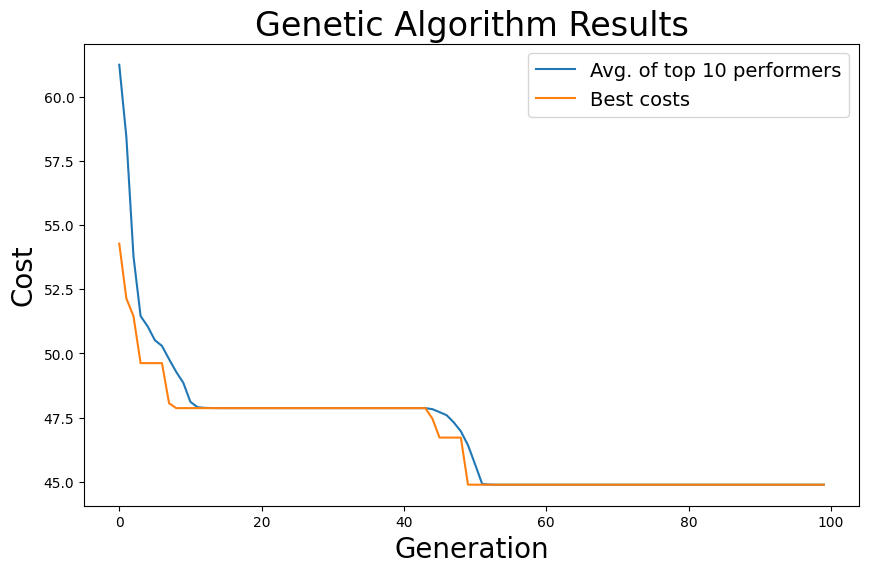

Material Matches:
{'mat1': [], 'mat2': [], 'mat3': []}


In [4]:
# Testing with a subset of property categories
HS.set_HS_optim_params_cython()
#HS.set_HS_optim_params()
print(f'lowest costs: {HS.lowest_costs}')
HS.print_table_of_best_designs()
HS.plot_optimization_results()
HS.get_material_matches()

matches_dict = HS.get_material_matches(consolidated_dict=consolidated_dict)
print("Material Matches:")
print(matches_dict)

In [5]:
mat_1_ids = ["mp-1509", "mp-546266", "mp-12863", "mp-16290"]
mat_2_ids = ["mp-12863", "mp-546266",]
mat_3_ids = ["mp-546266"]
matches_dict = {'mat1': mat_1_ids, 'mat2': mat_2_ids, 'mat3': mat_3_ids}


HS.get_material_match_costs(matches_dict=matches_dict, consolidated_dict=consolidated_dict)



MATERIALS PROJECT PAIRS AND HASHIN-SHTRIKMAN RECOMMENDED VOLUME FRACTION
Material 1 MP-ID    Material 2 MP-ID    Material 3 MP-ID      Phase 1 Electrical conductivity, [S/m]    Phase 2 Electrical conductivity, [S/m]    Phase 3 Electrical conductivity, [S/m]    Phase 1 Thermal conductivity, [W/m/K]    Phase 2 Thermal conductivity, [W/m/K]    Phase 3 Thermal conductivity, [W/m/K]    Phase 1 Bulk modulus, [GPa]    Phase 2 Bulk modulus, [GPa]    Phase 3 Bulk modulus, [GPa]    Phase 1 Shear modulus, [GPa]    Phase 2 Shear modulus, [GPa]    Phase 3 Shear modulus, [GPa]    Phase 1 Universal anisotropy, []    Phase 2 Universal anisotropy, []    Phase 3 Universal anisotropy, []    Phase 1 Volume Fraction    Phase 2 Volume Fraction    Phase 3 Volume Fraction     cost
------------------  ------------------  ------------------  ----------------------------------------  ----------------------------------------  ----------------------------------------  ---------------------------------------  ----